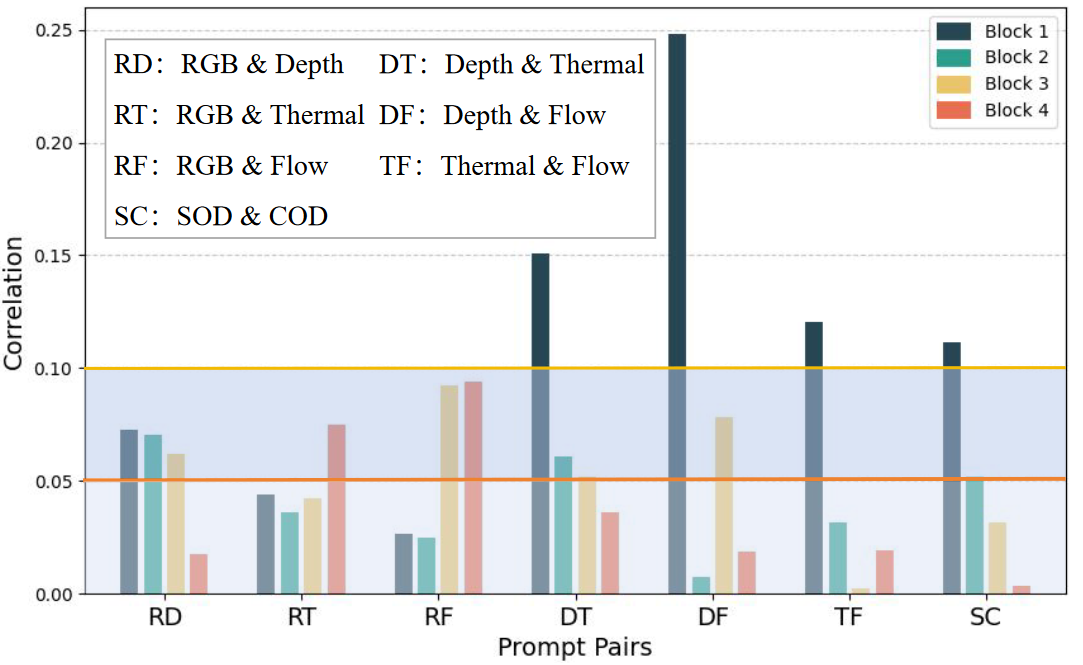

From [*VSCode: General Visual Salient and Camouflaged Object Detection with 2D Prompt Learning*](http://arxiv.org/abs/2311.15011)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


[  0  17  34  51  68  85 102]
[  3  20  37  54  71  88 105]
[  6  23  40  57  74  91 108]
[  9  26  43  60  77  94 111]


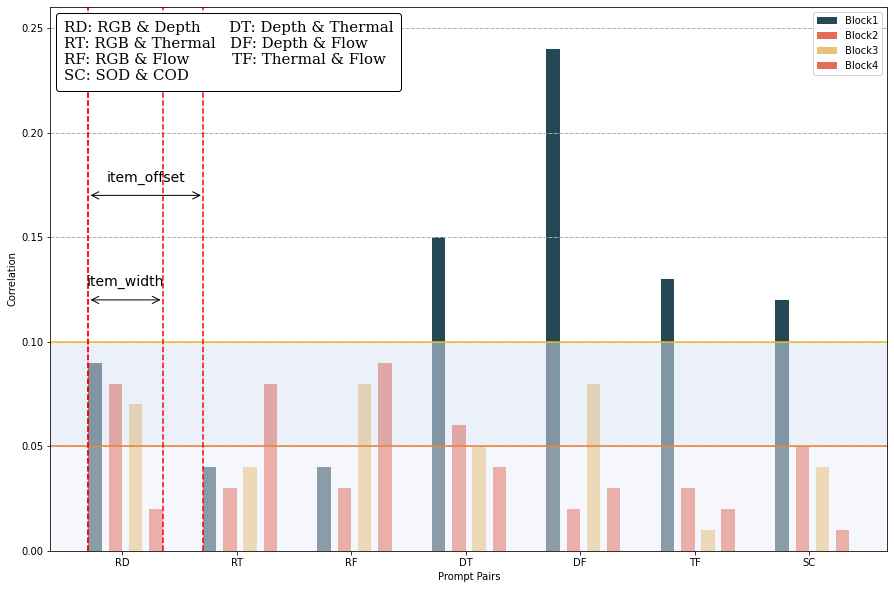

In [65]:
data = [
    ("Block1", [0.09, 0.04, 0.04, 0.15, 0.24, 0.13, 0.12], (37, 72, 84)),
    ("Block2", [0.08, 0.03, 0.03, 0.06, 0.02, 0.03, 0.05], (229, 109, 87)),
    ("Block3", [0.07, 0.04, 0.08, 0.05, 0.08, 0.01, 0.04], (235, 193, 117)),
    ("Block4", [0.02, 0.08, 0.09, 0.04, 0.03, 0.02, 0.01], (229, 109, 87)),
]
x_labels = ["RD", "RT", "RF", "DT", "DF", "TF", "SC"]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

item_interval = 6
bar_interval = 1
bar_width = item_interval // 3
item_width = bar_width * len(data) + bar_interval * (len(data) - 1)
item_offset = item_width + item_interval
bar_offset = bar_width + bar_interval

base_xs = np.arange(len(data[0][1])) * item_offset
for sample_idx, (name, values, color) in enumerate(data):
    curr_xs = base_xs + bar_offset * sample_idx
    print(curr_xs)
    ax.bar(x=curr_xs,
           height=values,
           width=bar_width,
           bottom=0,
           color=[c / 255 for c in color],
           label=name,
           align='edge') # align to the left edge
ax.set_xlabel("Prompt Pairs")
ax.set_ylabel("Correlation")
ax.set_xticks(base_xs + item_width // 2, x_labels)
ax.yaxis.grid(True, linestyle="dashed", linewidth=1, zorder=0)
ax.set_ylim(bottom=0, top=0.26)

# ax.hlines(...)
ax.axhline(y=0.05, xmin=0, xmax=1, color='#ee822f', alpha=1)
ax.axhline(y=0.10, xmin=0, xmax=1, color='#f0bd15', alpha=1)
ax.axhspan(ymin=0, ymax=0.05, facecolor='#edf1fa', alpha=0.5)
ax.axhspan(ymin=0.05, ymax=0.10, facecolor="#dbe4f5", alpha=0.5)


from matplotlib.patches import FancyArrowPatch
left_x = base_xs[0]

right_x = left_x + item_width
ax.vlines(x=[left_x, right_x], ymin=0, ymax=1, colors='red', linestyles="dashed")
anno_y = 0.12
# Arrow Style: https://matplotlib.org/stable/users/explain/text/annotations.html#customizing-annotation-arrows
ax.add_patch(FancyArrowPatch(posA=(left_x, anno_y), posB=(right_x, anno_y),
                             arrowstyle=f"<->, angleA=0, angleB=-0", mutation_scale=18))
ax.text((left_x + right_x) / 2, anno_y + 0.005, "item_width", ha="center", va="bottom", fontsize=14)

right_x = left_x + item_offset
ax.vlines(x=[left_x, right_x], ymin=0, ymax=1, colors='red', linestyles="dashed")
anno_y = 0.17
ax.add_patch(FancyArrowPatch(posA=(left_x, anno_y), posB=(right_x, anno_y),
                             arrowstyle=f"<->, angleA=0, angleB=-0", mutation_scale=18))
ax.text((left_x + right_x) / 2, anno_y + 0.005, "item_offset", ha="center", va="bottom", fontsize=14)

from matplotlib.offsetbox import AnchoredText

at = AnchoredText("RD: RGB & Depth      DT: Depth & Thermal"
                  "\nRT: RGB & Thermal   DF: Depth & Flow"
                  "\nRF: RGB & Flow         TF: Thermal & Flow"
                  "\nSC: SOD & COD",
                  prop=dict(size=15, family='serif'),
                  frameon=True,
                  loc='upper left')
at.patch.set_boxstyle("round, pad=0.1, rounding_size=0.2")
ax.add_artist(at)

ax.legend(loc="upper right")
plt.show()
